In [1]:
import numpy as np
import keras
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise
  return series[..., np.newaxis].astype(np.float32) # same as series[:, :, np.newaxis].astype(np.float32)

In [3]:
np.random.seed(42)
np.random.randint(100, size = 10)

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [4]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

In [5]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
  n_steps = series.shape[0]
  plt.plot(series, ".-", label='x')
  if y is not None:
    plt.plot(n_steps, y, "bx", label='actual y', markersize=10)
  if y_pred is not None:
    plt.plot(n_steps, y_pred, "ro", label="predicted y")
  plt.grid(True)
  if x_label:
    plt.xlabel(x_label, fontsize=16)
  if y_label:
    plt.ylabel(y_label, fontsize=16, rotation=0)
  plt.hlines(0, 0, 100, linewidth=1)
  plt.axis([0, n_steps + 1, None, None])
  plt.legend()

In [6]:
def plot_multiple_forecasts(X, Y, Y_pred):
  n_steps = X.shape[1]
  ahead = Y.shape[1]
  plot_series(X[0, :, 0])
  plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
  plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
  plt.axis([0, n_steps + ahead, None, None])
  plt.legend(fontsize=14)

In [7]:
def plot_learning_curves(loss, val_loss):
  plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
  plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
  plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
  plt.axis([1, 20, None, None])
  plt.legend(fontsize=14)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.grid(True)

In [8]:
from tensorflow.keras.utils import plot_model

In [9]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
assert tf.__version__>= "2.0"

import numpy as np
import os
from pathlib import Path

from tensorflow.keras.utils import plot_model

np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [10]:
simple_rnn = keras.models.Sequential([
  keras.layers.SimpleRNN(1, input_shape=[None, 1])
])
simple_rnn.compile(loss='mse', optimizer='adam')
history = simple_rnn.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

plot_model(simple_rnn, to_file='model_shapes.png', show_shapes=True)
simple_rnn.evaluate(X_valid, y_valid)

Epoch 1/20
219/219 [==============================] - 10s 32ms/step - loss: 0.2033 - val_loss: 0.1331
Epoch 2/20
219/219 [==============================] - 7s 32ms/step - loss: 0.1000 - val_loss: 0.0863
Epoch 3/20
219/219 [==============================] - 7s 32ms/step - loss: 0.0747 - val_loss: 0.0694
Epoch 4/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0612 - val_loss: 0.0575
Epoch 5/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0516 - val_loss: 0.0489
Epoch 6/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0445 - val_loss: 0.0424
Epoch 7/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0391 - val_loss: 0.0374
Epoch 8/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0349 - val_loss: 0.0333
Epoch 9/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0314 - val_loss: 0.0301
Epoch 10/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0286 - val_l

0.014119226485490799

<function matplotlib.pyplot.show>

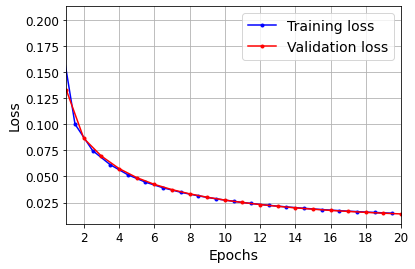

In [11]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show

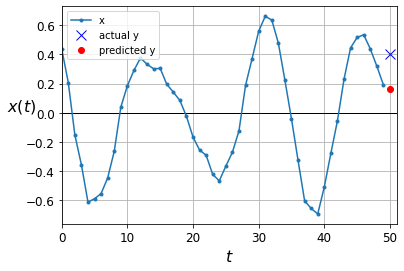

In [12]:
y_pred = simple_rnn.predict(X_test)
plot_series(X_test[0, :, 0], y_valid[0, :], y_pred[0, :])
plt.show()

#exercise 2

In [ ]:
deep_rnn = keras.models.Sequential([
  keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
  keras.layers.SimpleRNN(20, return_sequences=True),
  keras.layers.SimpleRNN(1)
])
deep_rnn.compile(loss='mse', optimizer='adam')
history = deep_rnn.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
219/219 [==============================] - 37s 161ms/step - loss: 0.0322 - val_loss: 0.0124
Epoch 2/20
219/219 [==============================] - 34s 157ms/step - loss: 0.0083 - val_loss: 0.0058
Epoch 3/20
219/219 [==============================] - 34s 157ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 4/20
219/219 [==============================] - 35s 158ms/step - loss: 0.0045 - val_loss: 0.0068
Epoch 5/20
219/219 [==============================] - 34s 157ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 6/20
219/219 [==============================] - 34s 157ms/step - loss: 0.0040 - val_loss: 0.0049
Epoch 7/20
219/219 [==============================] - 34s 157ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 8/20
219/219 [==============================] - 35s 158ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 9/20
219/219 [==============================] - 34s 157ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 10/20
219/219 [==============================] - 34s 154ms/step - l

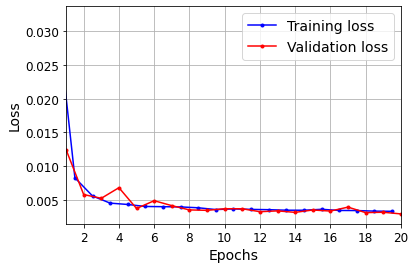

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

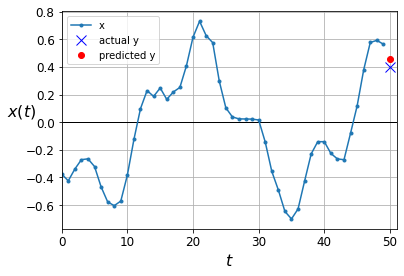

In [ ]:
y_pred = deep_rnn.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

#3

In [ ]:
deep_rnn_dense = keras.models.Sequential([
  keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
  keras.layers.SimpleRNN(20),
  keras.layers.Dense(1)
])
deep_rnn_dense.compile(loss='mse', optimizer='adam')
history = deep_rnn_dense.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid))


Epoch 1/20
219/219 [==============================] - 24s 103ms/step - loss: 0.0260 - val_loss: 0.0052
Epoch 2/20
219/219 [==============================] - 23s 103ms/step - loss: 0.0041 - val_loss: 0.0036
Epoch 3/20
219/219 [==============================] - 22s 102ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 4/20
219/219 [==============================] - 22s 102ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 5/20
219/219 [==============================] - 23s 103ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 6/20
219/219 [==============================] - 23s 103ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 7/20
219/219 [==============================] - 23s 103ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 8/20
219/219 [==============================] - 22s 103ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 9/20
219/219 [==============================] - 23s 103ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 10/20
219/219 [==============================] - 23s 103ms/step - l

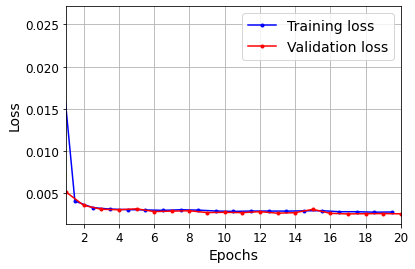

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

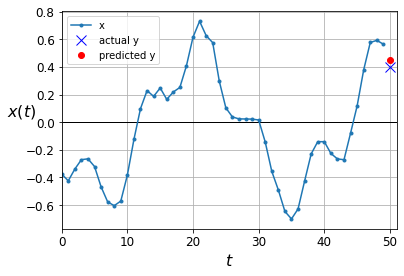

In [ ]:
y_pred = deep_rnn_dense.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()


#4

In [ ]:
np.random.seed(43)

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new

for step_ahead in range(10):
  print("{}".format(step_ahead), "iteration's X shape : ",X.shape, "Used data index :", "{} - {}".format(step_ahead, X.shape[1]-1))
  y_pred_one = deep_rnn_dense.predict(X[:, step_ahead:])[:, np.newaxis, :]
  X = np.concatenate([X, y_pred_one], axis=1)


0 iteration's X shape :  (1, 50, 1) Used data index : 0 - 49
1 iteration's X shape :  (1, 51, 1) Used data index : 1 - 50
2 iteration's X shape :  (1, 52, 1) Used data index : 2 - 51
3 iteration's X shape :  (1, 53, 1) Used data index : 3 - 52
4 iteration's X shape :  (1, 54, 1) Used data index : 4 - 53
5 iteration's X shape :  (1, 55, 1) Used data index : 5 - 54
6 iteration's X shape :  (1, 56, 1) Used data index : 6 - 55
7 iteration's X shape :  (1, 57, 1) Used data index : 7 - 56
8 iteration's X shape :  (1, 58, 1) Used data index : 8 - 57
9 iteration's X shape :  (1, 59, 1) Used data index : 9 - 58


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_valid.shape, Y_valid.shape)
print(X_test.shape, Y_test.shape)

(7000, 50, 1) (7000, 10)
(2000, 50, 1) (2000, 10)
(1000, 50, 1) (1000, 10)


In [ ]:
way2 = keras.models.Sequential([
  keras.layers.SimpleRNN(20,return_sequences=True, input_shape=[None, 1]),
  keras.layers.SimpleRNN(20),
  keras.layers.Dense(10)
])

In [ ]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = way2.predict(X_new)[..., np.newaxis]

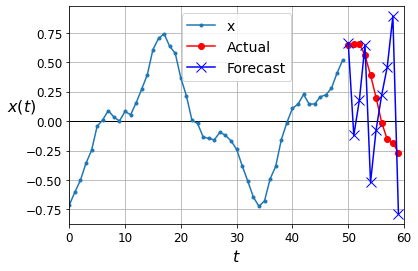

In [ ]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [ ]:
def last_time_step_mse(Y_true, Y_pred):
  return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

way3 = keras.models.Sequential([
  keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
  keras.layers.SimpleRNN(20, return_sequences=True),
  keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [ ]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)

X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]

Y = np.empty((10000, n_steps, 10)) # each target is a sequence of 10D vectors
for step_ahead in range(1, 10 + 1):
  Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [ ]:
np.random.seed(43)

series = generate_time_series(1, 50+10)
X_new, Y_new = series[:,:50,:], series[:,50:, :]
Y_pred = way3.predict(X_new)[:,-1][...,np.newaxis]

#5

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

lstm = keras.models.Sequential([
  keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
  keras.layers.LSTM(20, return_sequences=True),
  keras.layers.TimeDistributed(keras.layers.Dense(10))
])
lstm.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = lstm.fit(X_train, Y_train, epochs=20,validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 11s 27ms/step - loss: 0.0760 - last_time_step_mse: 0.0615 - val_loss: 0.0554 - val_last_time_step_mse: 0.0364
Epoch 2/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0480 - last_time_step_mse: 0.0283 - val_loss: 0.0427 - val_last_time_step_mse: 0.0222
Epoch 3/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0391 - last_time_step_mse: 0.0181 - val_loss: 0.0367 - val_last_time_step_mse: 0.0157
Epoch 4/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0350 - last_time_step_mse: 0.0151 - val_loss: 0.0334 - val_last_time_step_mse: 0.0132
Epoch 5/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0325 - last_time_step_mse: 0.0133 - val_loss: 0.0314 - val_last_time_step_mse: 0.0121
Epoch 6/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0308 - last_time_step_mse: 0.0122 - val_loss: 0.0298 - val_last_time_step_mse: 0.0112
Epoch 7/20
219/219 [=

In [ ]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)

X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]

Y = np.empty((10000, n_steps, 10)) # each target is a sequence of 10D vectors
for step_ahead in range(1, 10 + 1):
  Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [ ]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = lstm.predict(X_new)[:,-1][..., np.newaxis]

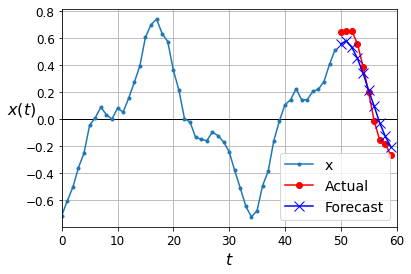

In [ ]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

#6

In [ ]:
shakespeare_url = "https://homl.info/shakespeare" # shortcut URL
filepath = keras.utils.get_file("shakespeare.txt", shakespeare_url)
with open(filepath) as f:
  shakespeare_text = f.read()

1122304/1115394 [==============================] - 0s 0us/step


In [ ]:
len(shakespeare_text)

1115394

In [ ]:
tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(shakespeare_text)

In [ ]:
print(shakespeare_text[1000:1500])

Second Citizen:
Would you proceed especially against Caius Marcius?

All:
Against him first: he's a very dog to the commonalty.

Second Citizen:
Consider you what services he has done for his country?

First Citizen:
Very well; and could be content to give him good
report fort, but that he pays himself with being proud.

Second Citizen:
Nay, but speak not maliciously.

First Citizen:
I say unto you, what he hath done famously, he did
it to that end: though soft-conscienced men can be
content to 


In [ ]:
tokenizer.texts_to_sequences(["First"])


[[20, 6, 9, 8, 3]]

In [ ]:
tokenizer.sequences_to_texts([[20, 6, 9, 8, 3]])

['f i r s t']

In [ ]:
tokenizer.texts_to_sequences(["abcde"])

[[5, 22, 19, 13, 2]]

In [ ]:
[encoded] = np.array(tokenizer.texts_to_sequences([shakespeare_text])) - 1

In [ ]:
max_id = len(tokenizer.word_index) # number of distinct characters
dataset_size = tokenizer.document_count # total number of characters


In [ ]:
train_size = dataset_size * 40 // 100
dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])

In [ ]:
n_steps = 100
window_length = n_steps + 1 # target = input shifted 1 character ahead
dataset = dataset.window(window_length, shift=1, drop_remainder=True)


In [ ]:
dataset = dataset.flat_map(lambda window: window.batch(window_length))

In [ ]:
batch_size = 32
dataset = dataset.shuffle(10000).batch(batch_size)
dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))

In [ ]:
dataset = dataset.map(
  lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))

In [ ]:
dataset = dataset.prefetch(1)


In [ ]:
model = keras.models.Sequential([
  keras.layers.LSTM(64, return_sequences=True, input_shape=[None, max_id],
                   dropout=0.2, recurrent_dropout=0),
  keras.layers.LSTM(64, return_sequences=True,
                    dropout=0.2, recurrent_dropout=0),
  keras.layers.TimeDistributed(keras.layers.Dense(max_id,
                              activation="softmax"))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")

In [ ]:
def preprocess(texts):
  X = np.array(tokenizer.texts_to_sequences(texts)) - 1
  return tf.one_hot(X, max_id)


In [ ]:
X_new = preprocess(["How are yo"])
Y_pred = model.predict_classes(X_new)
tokenizer.sequences_to_texts(Y_pred + 1)[0][-1] # 1st sentence, last char

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'h'

In [ ]:
def next_char(text, temperature=1):
  X_new = preprocess([text])
  y_proba = model.predict(X_new)[0, -1:, :]
  rescaled_logits = tf.math.log(y_proba) / temperature
  char_id = tf.random.categorical(rescaled_logits, num_samples=1) + 1
  return tokenizer.sequences_to_texts(char_id.numpy())[0]


In [ ]:
def complete_text(text, n_chars=50, temperature=1):
  for _ in range(n_chars):
    text += next_char(text, temperature)
  return text

In [ ]:
print(complete_text("t", temperature=0.2))


t:;&yoe-3
j.&lvj,s-pxh. b:kx:.? woystj3
g3cc bp
dm;


In [ ]:
print(complete_text("w", temperature=0.2))

w!?$ez?gmjz :3?ljb'va;!td&hi.ur3l'-j!3euq'
n?
nms3e


In [ ]:
print(complete_text("w", temperature=3))

w?hebxzwk33qfyzbopkci3,r'g,x:,:qn-grns;w:j,qsn&e:cs


#7

In [ ]:
import keras
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/eepLearning/AIP2_RNN_LAB_Activity/main/Ulsan_Temp.csv")

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([keras.layers.LSTM(32, return_sequences=True, input_shape = [None, 1]),
    keras.layers.LSTM(32),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)])

model.compile(loss='mse', optimizer='adam')
history=model.fit(X_train, y_train, epochs=20,
                  validation_data=(X_valid, y_valid))





Epoch 1/20
219/219 [==============================] - 10s 27ms/step - loss: 0.0909 - val_loss: 0.0609
Epoch 2/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0557 - val_loss: 0.0380
Epoch 3/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0357 - val_loss: 0.0354
Epoch 4/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0287 - val_loss: 0.0250
Epoch 5/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0242 - val_loss: 0.0249
Epoch 6/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0232 - val_loss: 0.0232
Epoch 7/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0226 - val_loss: 0.0225
Epoch 8/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0218 - val_loss: 0.0218
Epoch 9/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0211 - val_loss: 0.0224
Epoch 10/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0223 - val_l

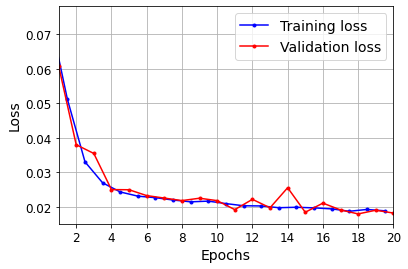

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"]
                     )
plt.show()

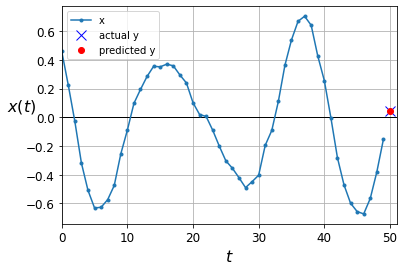

In [ ]:
y_pred = model.predict(X_test)
plot_series(X_test[0,:,0], y_test[0,0], y_test[0,0])
plt.show()

In [ ]:
n_steps = 5
real_temp = np.array([[26], [25.9], [24.1], [25.1], [25.8]]).reshape(1,n_steps,1)

In [ ]:
model.predict(real_temp)

array([[0.31892303]], dtype=float32)